# Hierarchical clustering

## 필요한 라이브러리 임포트

In [2]:
from sklearn.cluster import AgglomerativeClustering # hierarchical clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 사용법 정리

```
# example data 
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# clustering 객체 정의
clustering = AgglomerativeClustering(
    n_clusters = 2, 
    # 클러스터 수
    
    affinity = 'euclidean', 
    # 객체간 거리 계산 측도
    
    linkage = 'ward' 
    # 클러스터간 거리 계산 방법: {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

)

# clustering 학습
clustering.fit(X)

# clustering 학습 결과 label을 확인하려면?
clustering.labels_
```

### 클러스터간 거리 계산 방법 참고

![linkage](./linkage2.png)

![linkage](./ward.png)

## 사용법 예시

In [21]:
# 예시 데이터
X = np.array([[1, 3], [2, 4], [3, 3], [8, 2], [9, 2.5], [11, 1],[10,2]])

### 이해를 돕기 위한 시각화

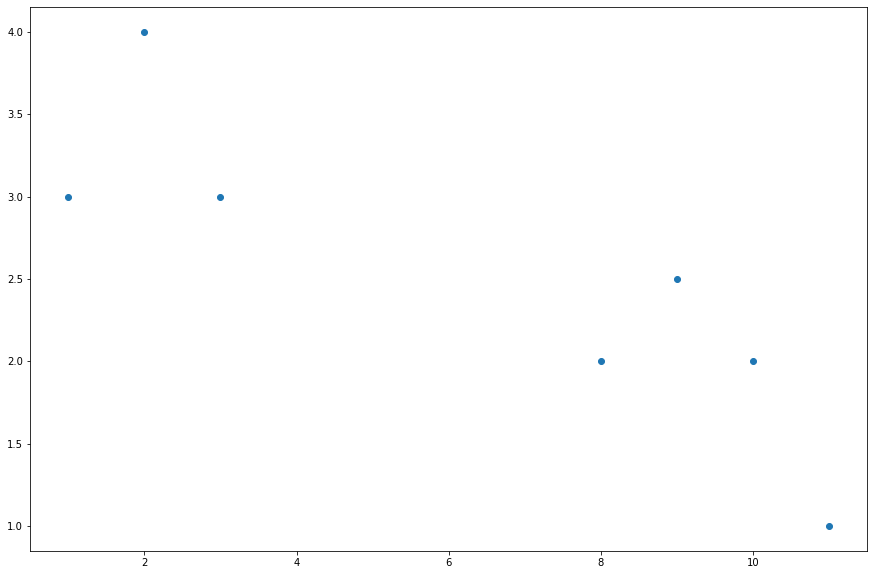

In [22]:
fig, ax = plt.subplots(figsize = (15,10))
# circle1 = plt.Circle((2, 3.5), 2, color='r',clip_on=False,fill=False)
# circle2 = plt.Circle((9, 1.5), 3, color='blue',clip_on=False,fill=False)

ax.scatter(X[:,0],X[:,1])
# ax.add_patch(circle1)
# ax.add_patch(circle2)
plt.show()

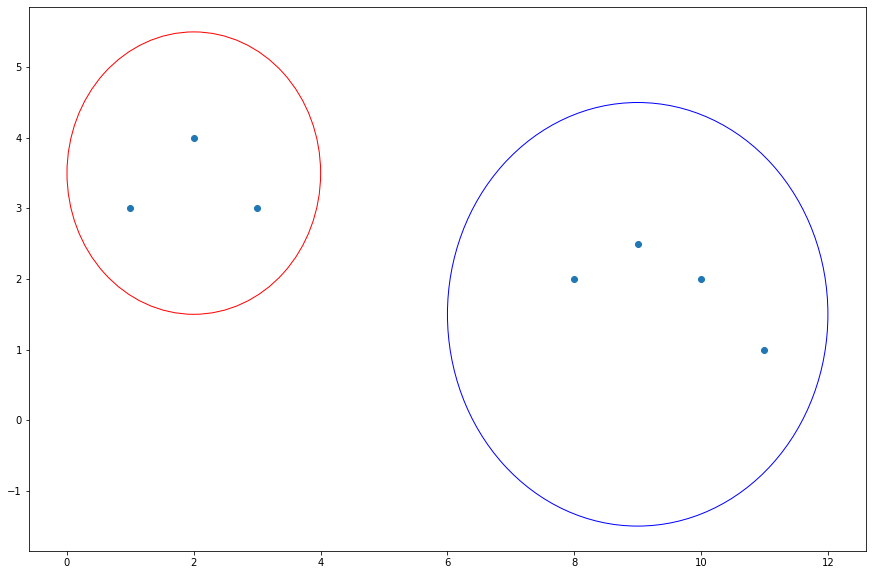

In [23]:
fig, ax = plt.subplots(figsize = (15,10))
circle1 = plt.Circle((2, 3.5), 2, color='r',clip_on=False,fill=False)
circle2 = plt.Circle((9, 1.5), 3, color='blue',clip_on=False,fill=False)

ax.scatter(X[:,0],X[:,1])
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.show()

In [24]:
# clustering 객체 정의
clustering = AgglomerativeClustering(
    n_clusters = 2,
    affinity = 'euclidean',
    linkage = 'ward'
)

In [25]:
# clustering 학습
clustering.fit(X)

AgglomerativeClustering()

In [26]:
# clustering 학습 결과 label을 확인하려면?
clustering.labels_

array([1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [ ]:
clustering.

### 결과 이해를 돕기 위한 시각화

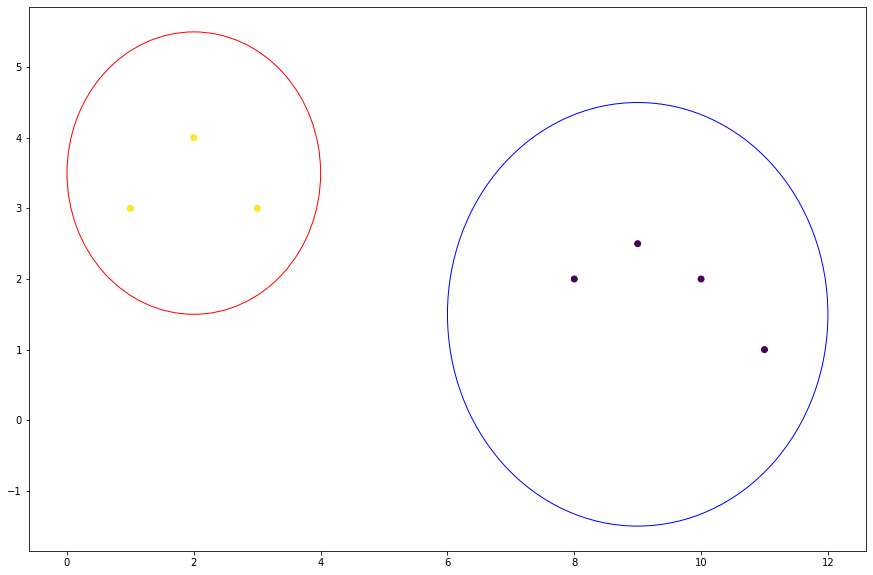

In [27]:
fig, ax = plt.subplots(figsize = (15,10))
circle1 = plt.Circle((2, 3.5), 2, color='r',clip_on=False,fill=False)
circle2 = plt.Circle((9, 1.5), 3, color='blue',clip_on=False,fill=False)

ax.scatter(X[:,0],X[:,1],c=clustering.labels_)
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.show()

## 실제 데이터 예시
- Iris data

In [78]:
from sklearn import metrics

In [79]:
x_df = pd.read_csv('./Data/Iris.csv')
x_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
# Iris 데이터 
# id 제외
x = x_df.iloc[:, 1:5].values

In [81]:
# 파라미터 설정
num_clusters = 2
n_instances, n_dim = x.shape

In [82]:
# 계층적 군집화 알고리즘 (Agglomerative - Ward) 실행 
ward = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit(x)
# ward.labels_

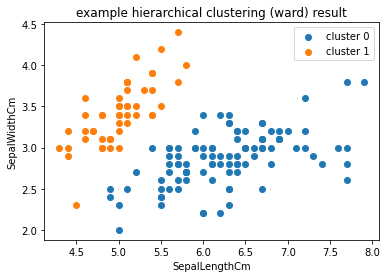

In [83]:
# 계층적 군집화 결과 plotting
unique_labels = np.unique(ward.labels_)

for i in unique_labels:
    cluster_member_mask = (ward.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example hierarchical clustering (ward) result')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [84]:
# 군집 중심 좌표 계산
C = np.zeros([num_clusters, n_dim])
for i in np.unique(ward.labels_):
# for i in range(3)과 동일
    C[i, :] = np.mean(x[ward.labels_==i, :], axis=0)
    # i 번째 cluster의 중심점(평균점)은 i번째 cluster에 속하는 관측들의 평균점
C

array([[6.262, 2.872, 4.906, 1.676],
       [5.006, 3.418, 1.464, 0.244]])

## 계층적 군집화에서 덴드로그램을 이용한 군집 수 결정


In [53]:
# import library 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [51]:
?linkage

In [54]:
?dendrogram

In [86]:
# 덴드로그램 작성을 위한 linkage matrix 계산
Z = linkage(x, method = 'ward',  metric='euclidean')
# x: iris data
# metric: euclidean, minkowski, cosine, jaccard, mahalanobis... 
# (check metrics in scipy.spatial.distance.pdist)

In [93]:
# 덴드로그램 작성
def plot_dendrogram(link_mat, n_clusters, mode=None, truncate_p=100):
    plt.figure(figsize=(20,10))
    plt.title('Hierarchical Clustering (Ward) Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        link_mat,
        color_threshold=Z[1-n_clusters, 2],
        truncate_mode=mode,
        p=truncate_p
    )
    plt.show()

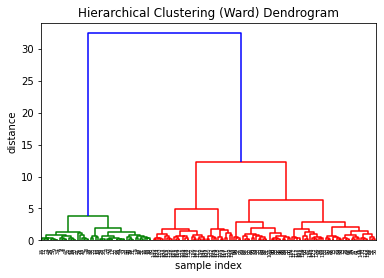

In [88]:
# 덴드로그램 (last 100 aggregation step) 작성
# truncate_p= 100
plot_dendrogram(Z, num_clusters)

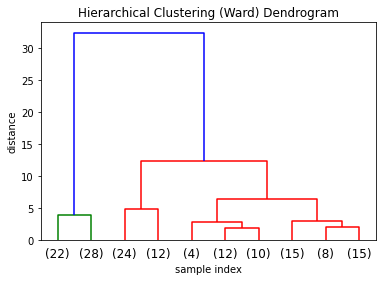

In [89]:
# 덴드로그램 (last 10 step) 작성
plot_dendrogram(Z, num_clusters, mode='lastp', truncate_p=10)

In [57]:
# 파라미터 설정
num_clusters = 3
n_instances, n_dim = x.shape

In [58]:
# 계층적 군집화 알고리즘 (Agglomerative - Ward) 실행 
ward = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit(x)
# ward.labels_

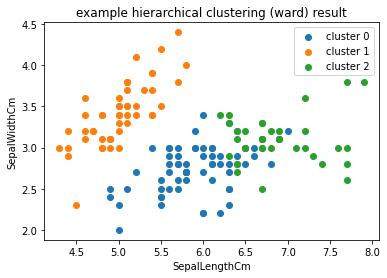

In [59]:
# 계층적 군집화 결과 plotting
unique_labels = np.unique(ward.labels_)

for i in np.unique(ward.labels_):
    cluster_member_mask = (ward.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example hierarchical clustering (ward) result')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [60]:
# 군집 중심 좌표 계산
C = np.zeros([num_clusters, n_dim])
for i in np.unique(ward.labels_):
    C[i, :] = np.mean(x[ward.labels_==i, :], axis=0)
C

array([[5.9203125 , 2.7515625 , 4.4203125 , 1.434375  ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.86944444, 3.08611111, 5.76944444, 2.10555556]])

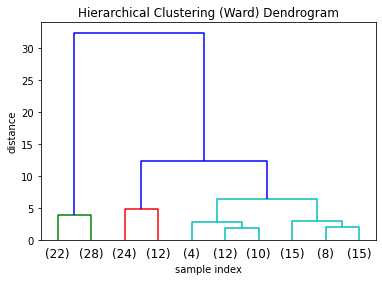

In [61]:
# 덴드로그램 (last 10 step) 작성
plot_dendrogram(Z, num_clusters, mode='lastp', truncate_p=10)

In [ ]:
# 실제로, label이 3종류 입니다.
print(x_df['Species'].unique())

## 실습
1. synthetic dataset 불러오기 - pd.read_excel('./Data/syn_data.xlsx')
2. 마지막 20개 node까지를 p로 설정해 plotting 하기
3. dendrogram보고 가장 적합한 클러스터 수를 결정하기
4. 적합한 클러스터 수로 데이터를 군집화하고, plotting 하기


In [68]:
# 1.
var_names = ['x1', 'x2']
x_df = pd.read_excel('./Data/syn_data.xlsx', header=None, names=var_names)
x_df.head()

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [ ]:
# 2. 
# 마지막 20개 node까지를 p로 설정해 plotting 하기

In [ ]:
# 3. dendrogram보고 가장 적합한 클러스터 수를 결정하기

In [ ]:
# 4. 적합한 클러스터 수로 데이터를 군집화하고, plotting 하기

## 해답

In [91]:
# 1.
var_names = ['x1', 'x2']
x_df = pd.read_excel('./Data/syn_data.xlsx', header=None, names=var_names)
x_df.head()

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


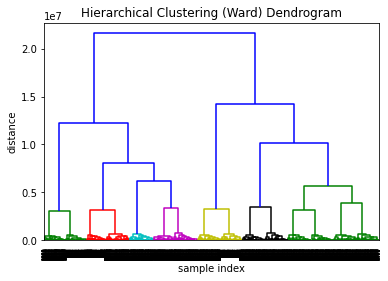

In [92]:
# 2. 
# 마지막 20개 node까지를 p로 설정해 plotting 하기
x = x_df.values
Z = linkage(x, method = 'ward',  metric='euclidean')
plot_dendrogram(Z,n_clusters=3, truncate_p=20)

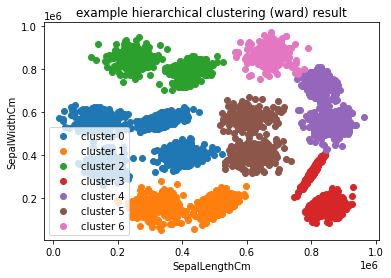

In [94]:
# 3. dendrogram보고 가장 적합한 클러스터 수를 결정하기

# 파라미터 설정
num_clusters = 7
n_instances, n_dim = x.shape

# 계층적 군집화 알고리즘 (Agglomerative - Ward) 실행 
ward = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit(x)
# ward.labels_

# 계층적 군집화 결과 plotting
unique_labels = np.unique(ward.labels_)

for i in np.unique(ward.labels_):
    cluster_member_mask = (ward.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example hierarchical clustering (ward) result')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()